# Evaluation

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn_evaluation import plot, table

sklearn-evluation has two main modules for evaluating classifiers: [sklearn_evaluation.plot](../api/plot.rst) and [sklearn_evaluation.table](../api/table.rst), let’s see an example of how to use them.

## Train a model
First, let’s load some data and split it in training and test set.

In [2]:
data = datasets.make_classification(200, 10, n_informative=5, class_sep=0.65)
X = data[0]
y = data[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now, we are going to train the data using one of the scikit-learn classifiers.

In [3]:
est = RandomForestClassifier(n_estimators=5)
est.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

## Input arguments
Most of the functions require us to pass the class predictions for the test set (``y_pred``), the scores assigned (``y_score``) and the ground truth classes (``y_true``), let’s define such variables.

In [4]:
y_pred = est.predict(X_test)
y_score = est.predict_proba(X_test)
y_true = y_test

## Confusion Matrix

We can start evaluating our model, the following example shows how to plot a confusion matrix.
A confusion matrix visualizes the performances of a classification algorithm. For a two-class classification problem it contains 4 different combinations of predicted and actual values.
We can infer four important metrics from this table:

`True Positive` : Model correctly classified a sample as positive.

`False Positive` : Model incorrectly classified a sample as positive.

`True Negative` : Model correctly classified a sample as negative.

`False Negative` : Model incorrectly classified a sample as negative.

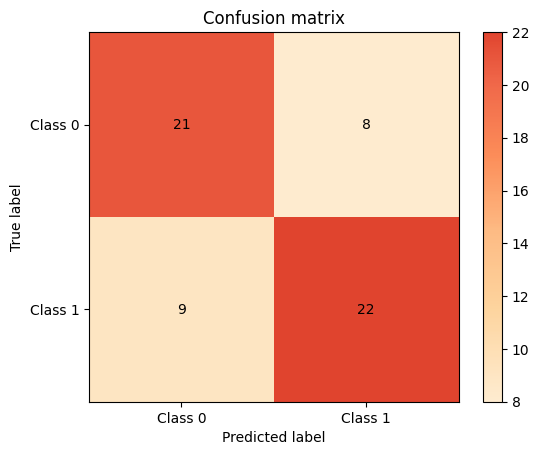

In [5]:
plot.ConfusionMatrix.from_raw_data(y_true, y_pred)

## Feature Importances
Some classifiers (such as [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) have feature importances, we can plot them by passing the estimator object to the feature_importances function.

<Axes: title={'center': 'Feature importances'}>

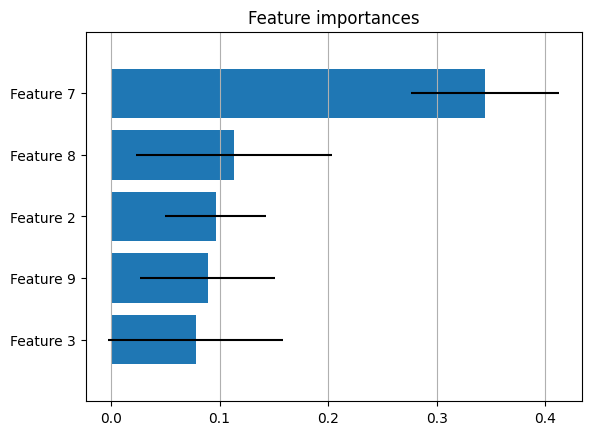

In [6]:
plot.feature_importances(est, top_n=5)

A feature importances function is also available in the table module.

In [7]:
print(table.feature_importances(est))

+----------------+--------------+-----------+
| feature_name   |   importance |      std_ |
+================+==============+===========+
| Feature 7      |    0.344234  | 0.080486  |
+----------------+--------------+-----------+
| Feature 8      |    0.113325  | 0.0619894 |
+----------------+--------------+-----------+
| Feature 2      |    0.0965527 | 0.0465778 |
+----------------+--------------+-----------+
| Feature 9      |    0.0890179 | 0.0899874 |
+----------------+--------------+-----------+
| Feature 3      |    0.077869  | 0.0682848 |
+----------------+--------------+-----------+
| Feature 6      |    0.0721979 | 0.0360088 |
+----------------+--------------+-----------+
| Feature 4      |    0.06679   | 0.0390513 |
+----------------+--------------+-----------+
| Feature 10     |    0.0600158 | 0.0743144 |
+----------------+--------------+-----------+
| Feature 1      |    0.0515845 | 0.0296386 |
+----------------+--------------+-----------+
| Feature 5      |    0.0284135 | 

## Classification Report

Precision describes how relevant the retrieved instances of positive class are.
Recall is the measure of the model correctly identifying the actual positives.
The F1 score can be interpreted as a harmonic mean of the precision and recall.

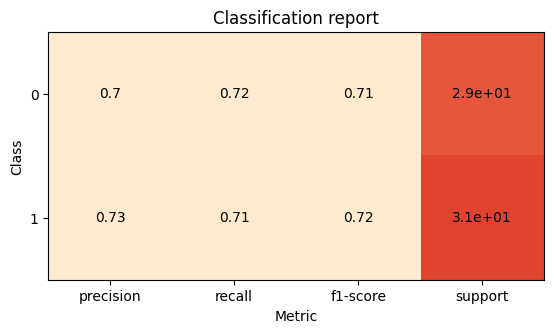

In [8]:
plot.ClassificationReport.from_raw_data(y_true, y_pred)

Now, let’s see how to generate two of the most common plots for evaluating classifiers: Precision-Recall and ROC.

## Precision Recall

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a classifier using different probability thresholds.
It is often used when the dataset is imbalanced.

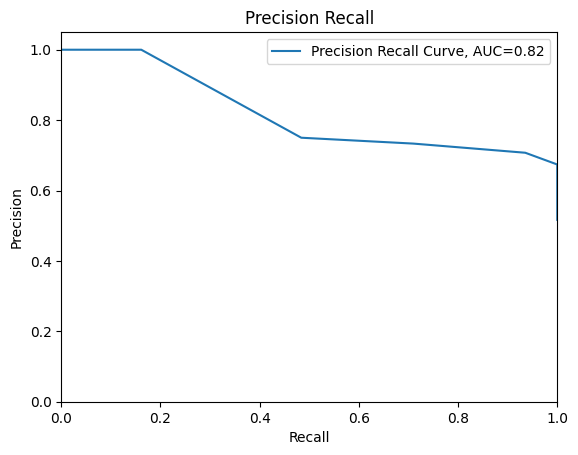

In [9]:
plot.PrecisionRecall.from_raw_data(y_true, y_score)

## ROC

An ROC curve (receiver operating characteristic curve) is a graph that shows a classification model's performance at all classification thresholds.
Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

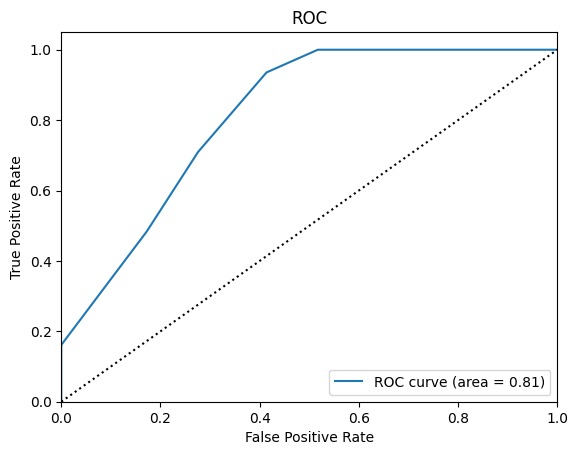

In [10]:
plot.ROC.from_raw_data(y_true, y_score)